In [180]:
import pandas as pd

In [181]:
df_frame_data               = pd.read_csv(r"df_frame_data_qubit3")
df_frame_connection_data    = pd.read_csv(r"df_frame_data_edge_qubit3")

In [182]:
df_frame_data.iloc[0,0]

7934267287378752615

### Example model

#### Heisenberg XYZ model


$$H = \sum_{i=1}^N (\sigma_i \sigma_{i+1} + h_i Z)$$

$\sigma_i = X_i, Y_i, Z_i$

In [183]:
import os, sys
sys.path.append("..")
import os, sys
sys.path.append("..\\..")

In [184]:
from opttrot.pauli import PauliElement
from opttrot.hamiltonian import Hamiltonian
import numpy as np

In [185]:
# X
Jx = 0.5
Jy = 0.25
Jz = 0.35
h = 0.6
Xs = [
    PauliElement(3, 0 , 3, Jx),
    PauliElement(6, 0 , 3, Jx),
    PauliElement(5, 0 , 3, Jx),
] 
Ys = [
    PauliElement(3, 3 , 3, Jy),
    PauliElement(6, 6 , 3, Jy),
    PauliElement(5, 5 , 3, Jy)
]
Zs =  [
    PauliElement(0, 3 , 3, Jz),
    PauliElement(0, 6 , 3, Jz),
    PauliElement(0, 5 , 3, Jz)
]
Z_m =  [
    PauliElement(0, 1, 3, h),
    PauliElement(0, 2, 3, h),
    PauliElement(0, 4, 3, h)
]

In [186]:
hamiltonian = Hamiltonian.from_iterables(Xs + Ys + Zs + Z_m)

In [187]:
hamiltonian.matrix.real

array([[ 2.85,  0.  ,  0.  ,  0.25,  0.  ,  0.25,  0.25,  0.  ],
       [ 0.  ,  0.25,  0.75,  0.  ,  0.75,  0.  ,  0.  ,  0.25],
       [ 0.  ,  0.75,  0.25,  0.  ,  0.75,  0.  ,  0.  ,  0.25],
       [ 0.25,  0.  ,  0.  , -0.95,  0.  ,  0.75,  0.75,  0.  ],
       [ 0.  ,  0.75,  0.75,  0.  ,  0.25,  0.  ,  0.  ,  0.25],
       [ 0.25,  0.  ,  0.  ,  0.75,  0.  , -0.95,  0.75,  0.  ],
       [ 0.25,  0.  ,  0.  ,  0.75,  0.  ,  0.75, -0.95,  0.  ],
       [ 0.  ,  0.25,  0.25,  0.  ,  0.25,  0.  ,  0.  , -0.75]])

In [188]:
hamiltonian.matrix.imag

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [91]:
hamiltonian.coef_matrix

array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.5 +0.j, 0.  +0.j, 0.5 +0.j,
        0.5 +0.j, 0.  +0.j],
       [0.  +0.j, 0.6 +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.6 +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.25+0.j, 0.  +0.j, 0.  +0.j, 0.35+0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.6 +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.35+0.j,
        0.  +0.j, 0.  +0.j],
       [0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.35+0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j]])

In [92]:
Hamiltonian(hamiltonian.coef_matrix)

Hamiltonian(terms:12)[
((0.5+0j), 'IXX'),
((0.5+0j), 'XIX'),
((0.5+0j), 'XXI'),
((0.6+0j), 'IIZ'),
((0.6+0j), 'IZI'),
((0.25+0j), 'IYY'),
((0.35+0j), 'IZZ'),
((0.6+0j), 'ZII'),
((0.25+0j), 'YIY'),
((0.35+0j), 'ZIZ'),
((0.25+0j), 'YYI'),
((0.35+0j), 'ZZI')
]

In [33]:
terms = [str(p.sym_code) for p in hamiltonian.poly]

In [34]:
terms_set = set(terms)

In [35]:
terms_set

{'(0, 1)',
 '(0, 2)',
 '(0, 3)',
 '(0, 4)',
 '(0, 5)',
 '(0, 6)',
 '(3, 0)',
 '(3, 3)',
 '(5, 0)',
 '(5, 5)',
 '(6, 0)',
 '(6, 6)'}

In [37]:
df_terms_set = set(df_frame_data.iloc[0, 1:])

In [40]:
terms_set-df_terms_set

{'(0, 3)',
 '(0, 5)',
 '(0, 6)',
 '(3, 0)',
 '(3, 3)',
 '(5, 0)',
 '(5, 5)',
 '(6, 0)',
 '(6, 6)'}

### About Hamiltonian Filtering

In each Frame, pick random 3 points in the graph who contains all product of Hamiltonians.
Search the Frames when they get intersection of each other.

In [196]:
terms  = set(terms)# Hamiltonian

In [198]:
def set_s(row):
    return set(row[1:10])
df_frame_data["set"] = df_frame_data.apply(set_s, axis=1)

In [203]:
def mark_ham(row):
    return len(row["set"]&terms)

In [204]:
df_frame_data["weight"] = df_frame_data.apply(mark_ham, axis=1)

In [208]:
df = df_frame_data.sort_values(by="weight", ascending=False)

In [212]:
df

,hash,Z0,X0,Y0,Z1,X1,Y1,Z2,X2,Y2,set,weight
775,-1830085280535857428,"(0, 4)","(7, 0)","(7, 4)","(0, 3)","(2, 0)","(2, 3)","(0, 5)","(3, 0)","(3, 5)","{(2, 3), (2, 0), (7, 0), (3, 5), (0, 5), (0, 4...",4
377,3662913983339273918,"(0, 2)","(6, 4)","(6, 6)","(0, 1)","(5, 4)","(5, 5)","(0, 7)","(4, 3)","(4, 4)","{(5, 5), (0, 7), (0, 1), (4, 4), (6, 6), (0, 2...",4
1011,-6364642141501424040,"(0, 5)","(6, 5)","(6, 0)","(0, 1)","(7, 6)","(7, 7)","(0, 6)","(2, 1)","(2, 7)","{(0, 1), (0, 6), (0, 5), (2, 7), (6, 5), (7, 6...",4
1012,-7962775183826868495,"(0, 5)","(6, 5)","(6, 0)","(0, 6)","(5, 0)","(5, 6)","(0, 7)","(7, 0)","(7, 7)","{(0, 7), (7, 0), (0, 6), (5, 6), (0, 5), (6, 5...",4
397,-2799224793022259998,"(0, 2)","(7, 0)","(7, 2)","(0, 6)","(5, 5)","(5, 3)","(0, 5)","(1, 3)","(1, 6)","{(1, 6), (7, 0), (5, 5), (0, 6), (5, 3), (0, 2...",4
...,...,...,...,...,...,...,...,...,...,...,...,...
2824,-3005045928780306066,"(4, 1)","(2, 4)","(6, 5)","(5, 6)","(3, 5)","(6, 3)","(1, 5)","(7, 7)","(6, 2)","{(1, 5), (6, 2), (6, 3), (5, 6), (3, 5), (6, 5...",0
2825,-7095842800041767062,"(4, 1)","(2, 5)","(6, 4)","(4, 3)","(3, 7)","(7, 4)","(5, 4)","(4, 2)","(1, 6)","{(2, 5), (1, 6), (6, 4), (5, 4), (4, 2), (3, 7...",0
2826,-7742972759619937703,"(4, 1)","(2, 5)","(6, 4)","(5, 4)","(2, 1)","(7, 5)","(3, 7)","(2, 0)","(1, 7)","{(2, 0), (2, 5), (5, 4), (1, 7), (3, 7), (7, 5...",0
2827,-8914181240070079689,"(4, 1)","(2, 6)","(6, 7)","(4, 3)","(7, 5)","(3, 6)","(1, 4)","(4, 2)","(5, 6)","{(1, 4), (3, 6), (5, 6), (2, 6), (6, 7), (4, 2...",0


In [216]:
from functools import reduce

In [218]:
sample3df = df[df.weight==4].sample(3)
point_set = reduce( lambda x, y: x|y, sample3df.set)
terms < point_set

False

In [222]:
point_hashes = None
for i in range(1000):
    sample3df = df[df.weight==4].sample(3)
    point_set = reduce( lambda x, y: x|y, sample3df.set)
    if terms <= point_set:
        point_hashes = sample3df.hash
        break



In [223]:
sample3df

,hash,Z0,X0,Y0,Z1,X1,Y1,Z2,X2,Y2,set,weight
2342,-7338025834355676710,"(2, 7)","(2, 1)","(0, 6)","(6, 0)","(0, 5)","(6, 5)","(0, 1)","(7, 6)","(7, 7)","{(0, 6), (0, 1), (0, 5), (2, 7), (6, 5), (7, 6...",4
610,-4406790390441312913,"(0, 3)","(6, 0)","(6, 3)","(0, 1)","(3, 0)","(3, 1)","(0, 7)","(4, 0)","(4, 7)","{(4, 0), (4, 7), (0, 7), (0, 1), (6, 3), (3, 1...",4
802,-7615631151030534210,"(0, 4)","(7, 3)","(7, 7)","(0, 5)","(3, 6)","(3, 3)","(0, 3)","(2, 1)","(2, 2)","{(0, 3), (7, 3), (2, 2), (3, 3), (3, 6), (0, 5...",4


In [ ]:
h1, h2, h3 = sample3df.hash
set1 = set([h1])
out_set1 = set([h1])
set2 = set([h2])
out_set2 = set([h2])
set3 = set([h3])
out_set3 = set([h3])

for i in range(10):
    # set 1

    # set 2


In [94]:
hash_map = df_frame_connection_data.loc[:, ["hash1"]] == df_frame_data.iloc[0,0]

In [95]:
df_frame_connection_data.head(20)

,hash1,hash2,i,j,type
0,7934267287378752615,-2712524540143647,0,2,5
1,7934267287378752615,-5605752759300810492,0,2,1
2,7934267287378752615,1895826367948997221,0,1,0
3,7934267287378752615,-5569813242417574939,0,2,2
4,7934267287378752615,-5229740537173257557,0,2,0
5,7934267287378752615,727507648582393740,1,2,2
6,7934267287378752615,2453504718811140942,0,1,1
7,7934267287378752615,-4465226254739119186,1,2,0
8,7934267287378752615,6849681360195899694,2,1,2
9,7934267287378752615,-2543978279177338542,1,2,1


In [23]:
df_frame_connection_data["hash2"][25:340]

25     8994921704264345141
26    -3162998179534418416
27      727507648582393740
28     -451347115950274027
29      727507648582393740
              ...         
335    1895826367948997221
336    3433511530960803163
337    8994921704264345141
338   -2106485159988134051
339      -2712524540143647
Name: hash2, Length: 315, dtype: int64

In [96]:
from networkx import Graph
import networkx as nx

In [97]:
from networkx import from_pandas_edgelist

In [98]:
df = df_frame_connection_data.copy()

In [99]:
df['pair'] = df.apply(lambda x: frozenset([x['hash1'], x['hash2']]), axis=1)
df_unique = df.drop_duplicates(subset=['pair']).drop(columns=['pair'])


In [169]:
df_unique.head(25)

,hash1,hash2,i,j,type
0,7934267287378752615,-2712524540143647,0,2,5
1,7934267287378752615,-5605752759300810492,0,2,1
2,7934267287378752615,1895826367948997221,0,1,0
3,7934267287378752615,-5569813242417574939,0,2,2
4,7934267287378752615,-5229740537173257557,0,2,0
5,7934267287378752615,727507648582393740,1,2,2
6,7934267287378752615,2453504718811140942,0,1,1
7,7934267287378752615,-4465226254739119186,1,2,0
8,7934267287378752615,6849681360195899694,2,1,2
9,7934267287378752615,-2543978279177338542,1,2,1


In [110]:
[(d.values[0], list(d.values[1:])) for (n, d) in df_frame_data[:10].iterrows()]

[(7934267287378752615,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 2)',
   '(2, 2)',
   '(2, 0)',
   '(4, 4)',
   '(4, 0)',
   '(0, 4)']),
 (-2543978279177338542,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 2)',
   '(2, 4)',
   '(2, 6)',
   '(0, 4)',
   '(4, 2)',
   '(4, 6)']),
 (-4465226254739119186,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 2)',
   '(6, 0)',
   '(6, 2)',
   '(0, 6)',
   '(4, 0)',
   '(4, 6)']),
 (727507648582393740,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 2)',
   '(6, 4)',
   '(6, 6)',
   '(0, 6)',
   '(4, 2)',
   '(4, 4)']),
 (-8549410598421312604,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 4)',
   '(4, 4)',
   '(4, 0)',
   '(0, 2)',
   '(2, 0)',
   '(2, 2)']),
 (7790827241443188746,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 4)',
   '(4, 6)',
   '(4, 2)',
   '(0, 2)',
   '(2, 4)',
   '(2, 6)']),
 (-4688315692107877897,
  ['(0, 1)',
   '(1, 0)',
   '(1, 1)',
   '(0, 4)',
   '(6, 0)',
   '(6, 4)',
   '(0, 6)',
   '(2, 0)',
   '(2, 6)']),
 (-

In [125]:
G = from_pandas_edgelist(df_unique, "hash1", "hash2", edge_attr="type")
G.add_nodes_from([(d.values[0], {"terms": set(d.values[1:])}) for (n, d) in df_frame_data.iterrows()])

In [171]:
#nodes = [7934267287378752615, -2712524540143647	, -5605752759300810492, 1895826367948997221, -5569813242417574939, -5229740537173257557	]
nodes = [7934267287378752615] + list(df_unique["hash2"][:400])
subgraph = G.subgraph(nodes).copy()
layout_graph = nx.kamada_kawai_layout(subgraph)

In [172]:
G[7934267287378752615]

AtlasView({-2712524540143647: {'type': 5}, -5605752759300810492: {'type': 1}, 1895826367948997221: {'type': 0}, -5569813242417574939: {'type': 2}, -5229740537173257557: {'type': 0}, 727507648582393740: {'type': 2}, 2453504718811140942: {'type': 1}, -4465226254739119186: {'type': 0}, 6849681360195899694: {'type': 2}, -2543978279177338542: {'type': 1}, 8994921704264345141: {'type': 2}, 8127621988576123990: {'type': 2}, 6320433706638651289: {'type': 5}, 6981374070992382908: {'type': 2}, -2385350220999172739: {'type': 5}})

In [173]:
len(nodes)

401

In [174]:
list(subgraph[7934267287378752615].keys())

[-5605752759300810492,
 6849681360195899694,
 -2543978279177338542,
 1895826367948997221,
 -5229740537173257557,
 2453504718811140942,
 -4465226254739119186,
 6981374070992382908,
 -5569813242417574939,
 8127621988576123990,
 -2712524540143647,
 727507648582393740,
 8994921704264345141,
 6320433706638651289,
 -2385350220999172739]

In [175]:
G[7934267287378752615][-2712524540143647]

{'type': 5}

In [176]:
style_map = {
    0: 'solid',
    1: 'dashed',
    2: 'dotted',
    3: 'dashdot',
    4: 'solid',
    5: 'solid'
}
edge_styles = [style_map[subgraph[u][v]['type']] for u, v in subgraph.edges()]
# Define color map for each edge type
color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'black'
}

# Create a list of colors for edges based on their type attribute
edge_colors = [color_map[G[u][v]['type']] for u, v in subgraph.edges()]

In [177]:
from matplotlib import pyplot as plt

In [178]:
# node position
directions = {
    0: (1, 0),   # Right
    1: (0, 1),   # Top
    2: (-1, 0),  # Left
    3: (0, -1),  # Bottom
    4: (1, 1),   # Top-right diagonal
    5: (-1, -1)  # Bottom-left diagonal
}
initial_node = 7934267287378752615
pos = {}
pos[initial_node] = (0, 0)

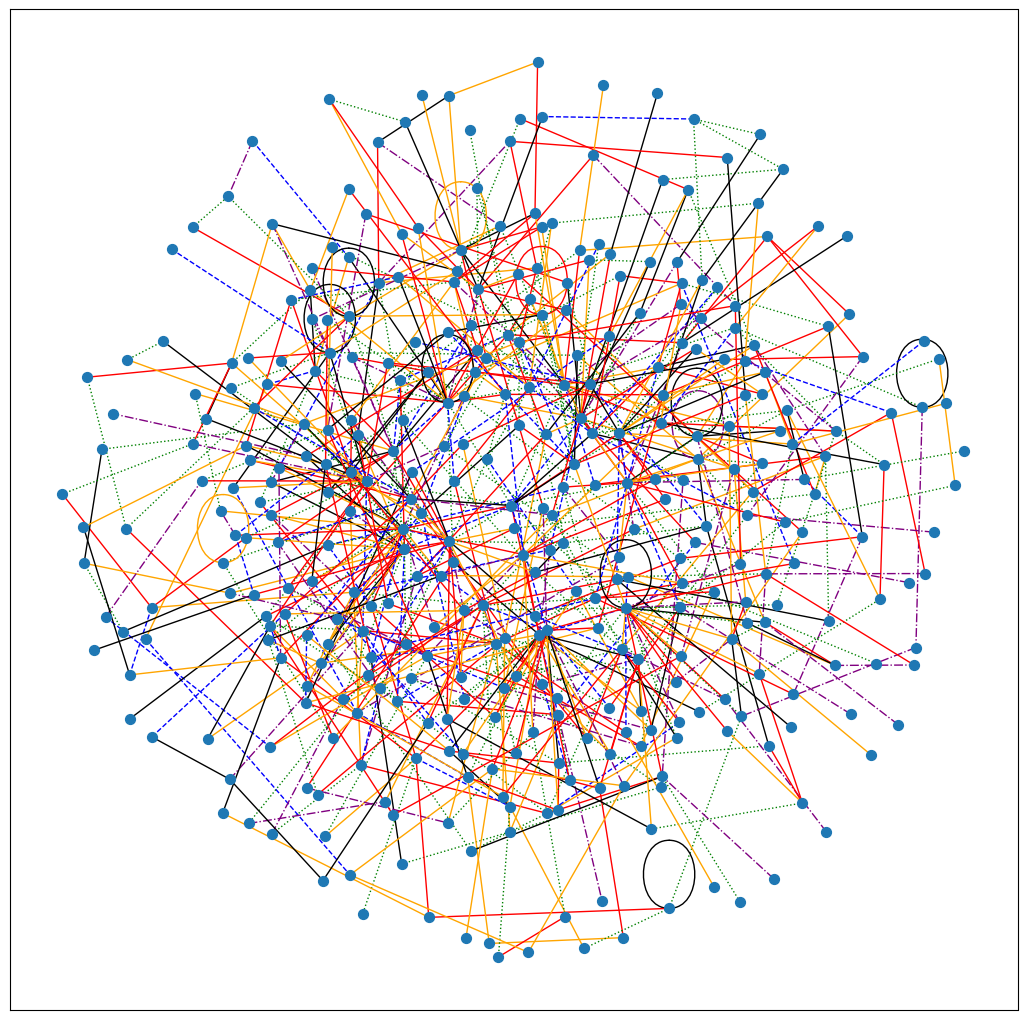

In [179]:
fig, ax = plt.subplots(1,1, figsize=(13, 13))

#nx.draw_networkx_nodes(
#    G= subgraph,
#    ax = ax ,
#    node_size = 50,
#    node_color = ["#ff0000"] + (len(nodes)-1)*["#0000ff"],
#    pos=nx.kamada_kawai_layout(subgraph)
#)
# Draw edges with specific colors and styles
for edge, color, style in zip(subgraph.edges(), edge_colors, edge_styles):
    nx.draw_networkx_edges(subgraph, layout_graph, ax=ax, edgelist=[edge], edge_color=color, style=style)
node_colors = ["red"] + (len(nodes)-1)*["black"]
nx.draw_networkx_nodes(subgraph, layout_graph, node_size=50, ax=ax)

In [61]:

nodes = [7934267287378752615] + list(df_unique["hash2"][30:800])
subgraph = g.subgraph(nodes).copy()

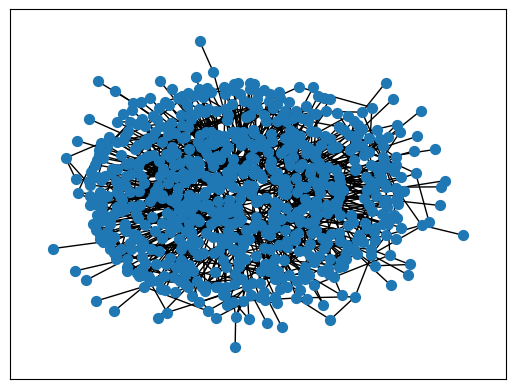

In [62]:
nx.draw_networkx(subgraph, with_labels=False,  node_size=50, pos=nx.kamada_kawai_layout(subgraph))